<h1>Group Members:</>
<h2>Syed Babar Tameez. DWDM Group-1. CMS: 252769</>
<h2>Muhammad Ateeb. DWDM Group-1. CMS: 251414</>
<h2>Abdul Basit. DWDM Group-2. CMS: 241534</>
<h2>Muhammad Hamza Naviwala. DWDM Group-2. CMS: 261292</>


In [ ]:
import pandas as pd
import os

In [ ]:
marketing_campaign_data = '/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [ ]:
len(marketing_campaign_dataframe)

2240

In [ ]:
marketing_campaign_dataframe.head()

index    ID  Year_Birth  ... Z_CostContact Z_Revenue  Response
0      0  5524        1957  ...             3        11         1
1      1  2174        1954  ...             3        11         0
2      2  4141        1965  ...             3        11         0
3      3  6182        1984  ...             3        11         0
4      4  5324        1981  ...             3        11         0

[5 rows x 30 columns]

In [ ]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

In [ ]:
marketing_campaign_dataframe['Total spent'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['MntWines'] + marketing_campaign_dataframe['MntFruits'] +
                           marketing_campaign_dataframe['MntMeatProducts'] + marketing_campaign_dataframe['MntFishProducts'] + 
                           marketing_campaign_dataframe['MntSweetProducts'] + marketing_campaign_dataframe['MntGoldProds'], axis=1)

marketing_campaign_dataframe['Total accept cmp'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['AcceptedCmp1'] + marketing_campaign_dataframe['AcceptedCmp2'] +
                           marketing_campaign_dataframe['AcceptedCmp3'] + marketing_campaign_dataframe['AcceptedCmp4'] + 
                           marketing_campaign_dataframe['AcceptedCmp5'], axis=1)

marketing_campaign_dataframe['Total purchases'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['NumDealsPurchases'] + marketing_campaign_dataframe['NumWebPurchases'] +
                           marketing_campaign_dataframe['NumCatalogPurchases'] + marketing_campaign_dataframe['NumStorePurchases'], axis=1)

In [ ]:
marketing_campaign_dataframe.head()

index    ID  Year_Birth  ... Total spent Total accept cmp  Total purchases
0      0  5524        1957  ...        1617                0               25
1      1  2174        1954  ...          27                0                6
2      2  4141        1965  ...         776                0               21
3      3  6182        1984  ...          53                0                8
4      4  5324        1981  ...         422                0               19

[5 rows x 33 columns]

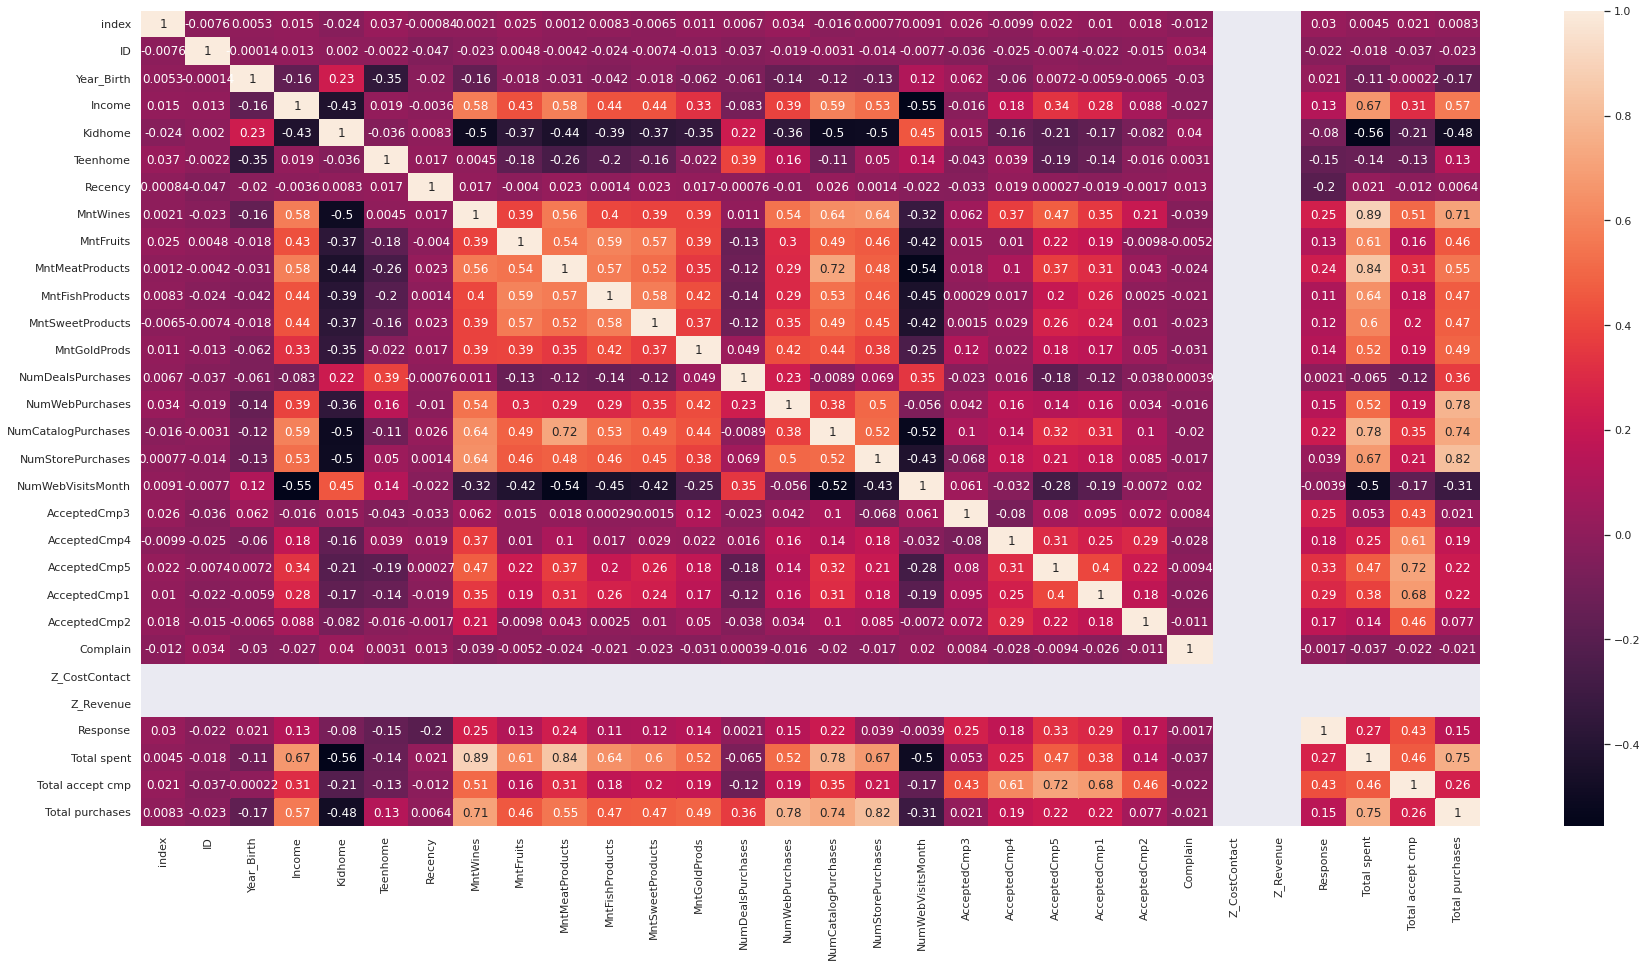

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(30, 15))
sns.heatmap(marketing_campaign_dataframe.corr(), annot=True)

plt.show()

In [ ]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['ID', 'Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases']].copy()

X.columns = ['Customer identification', 'Education', 'Marital Status', 'Customer annual income',
             'Children at home', 'Teenagers at home', 'Recency', 'Customer complaints',
             'spent on wine', 'spent on fruits', 'spent on meat', 'spent on fish',
             'spent on candy', 'spent products in gold', 'purchases made at a discount',
             'purchases made by the site', 'purchases made by the catalog',
             'purchases made in the physical store', 'visits to the site monthly',
             'Offer accepted in third campaign', 'Offer accepted in fourth campaign',
             'Offer accepted in the fifth campaign', 'Offer accepted in the first campaign',
             'Offer accepted in the second campaign', 'Complaints', 'Customer response to the campaign',
             'Total spent', 'Total accepted during the campaign', 'Total purchases']

X.head()

Customer identification  ... Total purchases
0                     5524  ...              25
1                     2174  ...               6
2                     4141  ...              21
3                     6182  ...               8
4                     5324  ...              19

[5 rows x 29 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Education', 'Marital Status'])
X.columns = ['Customer ID', 'Customer Annual Income', 'Qnt. Children at home', 'Qnt. Teenagers at home',
             'Recency', 'Customer Complaints', 'spent on wine', 'spent on fruits',
             'spent on meat', 'spent on fish', 'spent on candy',
             'spent products in gold', 'purchases made at a discount',
             'purchases made by the site','purchases made by the catalog',
             'purchases made in the physical store', 'visits to the site monthly',
             'Offer accepted in third campaign', 'Offer accepted in fourth campaign',
             'Offer accepted in the fifth campaign', 'Offer accepted in the first campaign',
             'Offer accepted in the second campaign', 'Complaints', 'Customer response to the campaign',
             'Total spent', 'Total accepted during the campaign', 'Total purchases',
             'Doctor', 'High School', 'Higher Education', 'Master', 'PhD',
             'Absurd Marital Status', 'Alone Marital Status', 'Divorced Marital Status',
             'Married Marital Status', 'Single Marital Status', 'Married Marital Status',
             'Widowed Marital Status', 'Detached Marital Status']

X.head()

Customer ID  ...  Detached Marital Status
0         5524  ...                        0
1         2174  ...                        0
2         4141  ...                        0
3         6182  ...                        0
4         5324  ...                        0

[5 rows x 40 columns]

In [ ]:
for content in X:
    X.dropna(subset=[content], inplace=True)

#Comparison between Total Amount Spent and individual Items


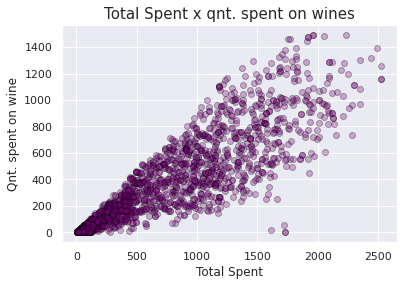

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X['Total spent'], X['spent on wine'], alpha=0.3, color='purple',
            edgecolors='black')

plt.title('Total Spent x qnt. spent on wines', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on wine', fontsize=12)

plt.show()

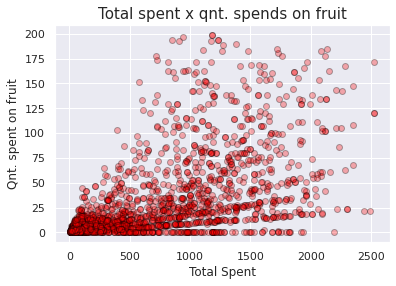

In [ ]:
plt.scatter(X['Total spent'], X['spent on fruits'], alpha=0.3, color='red',
            edgecolors='black')

plt.title('Total spent x qnt. spends on fruit', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on fruit', fontsize=12)

plt.show()

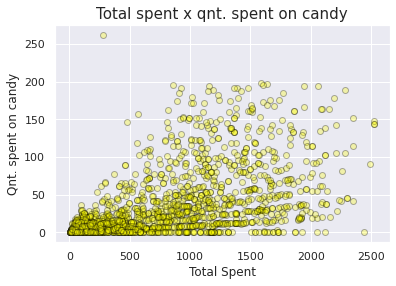

In [ ]:
plt.scatter(X['Total spent'], X['spent on candy'], alpha=0.3, color='yellow',
            edgecolors='black')

plt.title('Total spent x qnt. spent on candy', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on candy', fontsize=12)

plt.show()

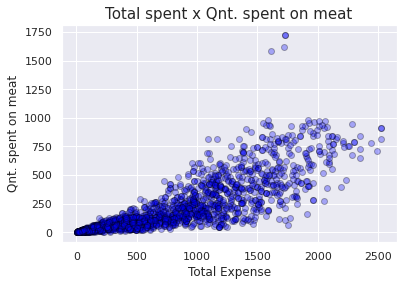

In [ ]:
plt.scatter(X['Total spent'], X['spent on meat'], alpha=0.3, color='blue',
            edgecolors='black')

plt.title('Total spent x Qnt. spent on meat', fontsize=15)
plt.xlabel('Total Expense', fontsize=12)
plt.ylabel('Qnt. spent on meat', fontsize=12)

plt.show()

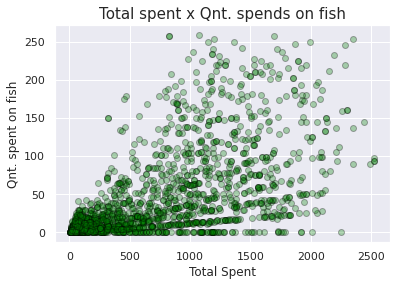

In [ ]:
plt.scatter(X['Total spent'], X['spent on fish'], alpha=0.3, color='green',
            edgecolors='black')

plt.title('Total spent x Qnt. spends on fish', fontsize=15)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Qnt. spent on fish', fontsize=12)

plt.show()

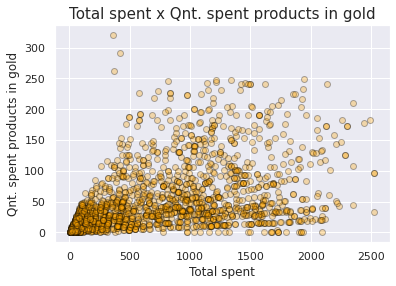

In [ ]:
plt.scatter(X['Total spent'], X['spent products in gold'], alpha=0.3, color='orange',
            edgecolors='black')

plt.title('Total spent x Qnt. spent products in gold', fontsize=15)
plt.xlabel('Total spent', fontsize=12)
plt.ylabel('Qnt. spent products in gold', fontsize=12)

plt.show()

#Comparision Between Customer Annual Income and money spent on individual Items


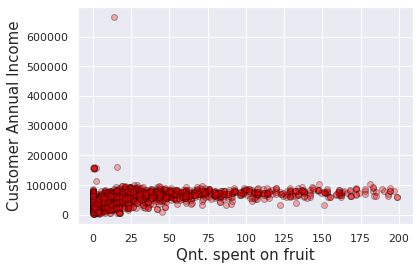

In [ ]:
plt.scatter(X['spent on fruits'], X['Customer Annual Income'], alpha=0.3, 
            color='red', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on fruit', fontsize=15)
plt.show()

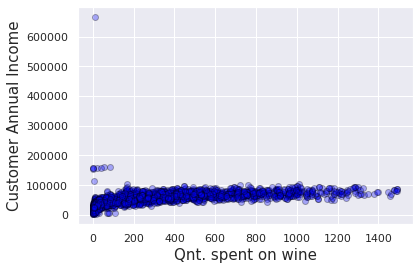

In [ ]:
plt.scatter(X['spent on wine'], X['Customer Annual Income'], alpha=0.3, 
            color='blue', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on wine', fontsize=15)
plt.show()

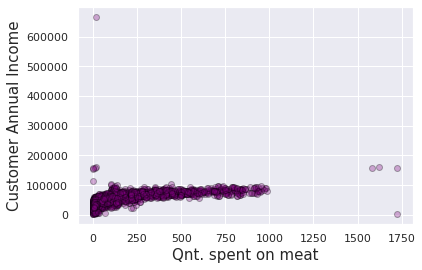

In [ ]:
plt.scatter(X['spent on meat'], X['Customer Annual Income'], alpha=0.3, 
            color='purple', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on meat', fontsize=15)
plt.show()

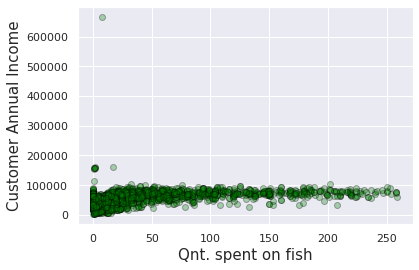

In [ ]:
plt.scatter(X['spent on fish'], X['Customer Annual Income'], alpha=0.3, 
            color='green', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on fish', fontsize=15)
plt.show()

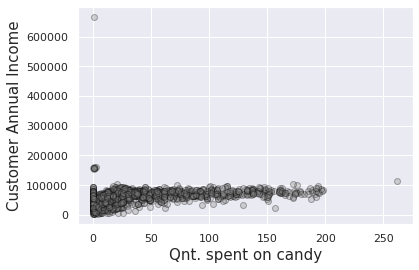

In [ ]:
plt.scatter(X['spent on candy'], X['Customer Annual Income'], alpha=0.3, 
            color='gray', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent on candy', fontsize=15)
plt.show()

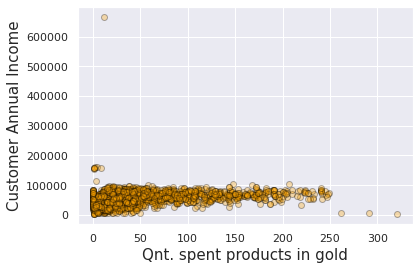

In [ ]:
plt.scatter(X['spent products in gold'], X['Customer Annual Income'], alpha=0.3, 
            color='orange', edgecolors='black')

plt.ylabel('Customer Annual Income', fontsize=15)
plt.xlabel('Qnt. spent products in gold', fontsize=15)
plt.show()

# Linear Analysis of Customer Annual Income and Money spent on individual items


In [ ]:
linear_analysis_axisX = X[['spent on wine', 'spent on meat', 'spent on candy',
                           'spent on fish', 'spent on fruits', 'spent products in gold']]

linear_analysis_axisY = X[['Customer Annual Income']]

In [ ]:
from sklearn.model_selection import train_test_split

linear_Xtrain, linear_Xtest, linear_ytrain, linear_ytest = train_test_split(
    linear_analysis_axisX, linear_analysis_axisY, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(linear_Xtrain, linear_ytrain)

In [ ]:
linear_pred = linear_model.predict(linear_Xtest)

In [ ]:
from sklearn.metrics import r2_score

print('coefficient of determination: ', r2_score(linear_ytest, linear_pred))

coefficient of determination:  0.6767215200850755


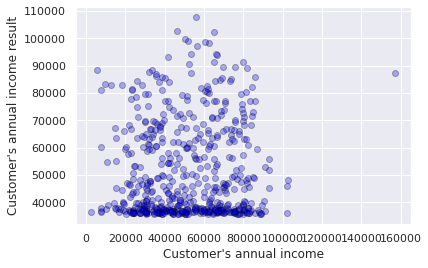

In [ ]:
plt.scatter(linear_analysis_axisY.iloc[0:554, :], linear_pred, alpha=0.3, color='blue',
            edgecolors='black')

plt.xlabel('Customer\'s annual income', fontsize=12)
plt.ylabel('Customer\'s annual income result', fontsize=12)

plt.show()

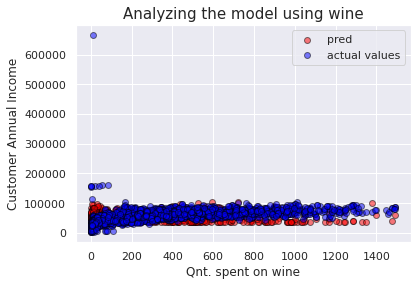

In [ ]:
plt.scatter(linear_analysis_axisX.iloc[0:554, [0]], linear_pred, alpha=0.5,
            color='red', edgecolors='black', label='pred')

plt.scatter(X['spent on wine'], X['Customer Annual Income'], alpha=0.5,
            color='blue', edgecolors='black', label='actual values')

plt.title('Analyzing the model using wine', fontsize=15)
plt.xlabel('Qnt. spent on wine', fontsize=12)
plt.ylabel('Customer Annual Income', fontsize=12)

plt.legend()
plt.show()

#Training ANN to predict Customer response to campaign

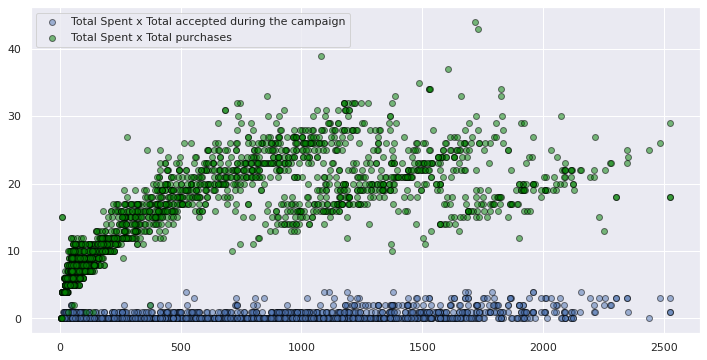

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(X['Total spent'], X['Total accepted during the campaign'], alpha=0.5,
            edgecolors='black',  label='Total Spent x Total accepted during the campaign')

plt.scatter(X['Total spent'], X['Total purchases'], alpha=0.5, color='green',
            edgecolors='black',  label='Total Spent x Total purchases')

plt.legend()
plt.show()

In [ ]:
deep_learning_X = X[['Complaints', 'Total spent', 'Total accepted during the campaign',
                     'Total purchases']]

deep_learning_y = X[['Customer response to the campaign']]

In [ ]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X, deep_learning_y, test_size=0.25, shuffle=True
)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.7971
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8621
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8603
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8609
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8627
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8627
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8627
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8627
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8639
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3580 - accura

In [ ]:
print(ann.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[[False]]


In [ ]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [ ]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[466   8]
 [ 65  15]]
accuracy score for confusion matrix:  0.868231046931408


#Training ANN to predict Customer response to campaign wrt degree of customer

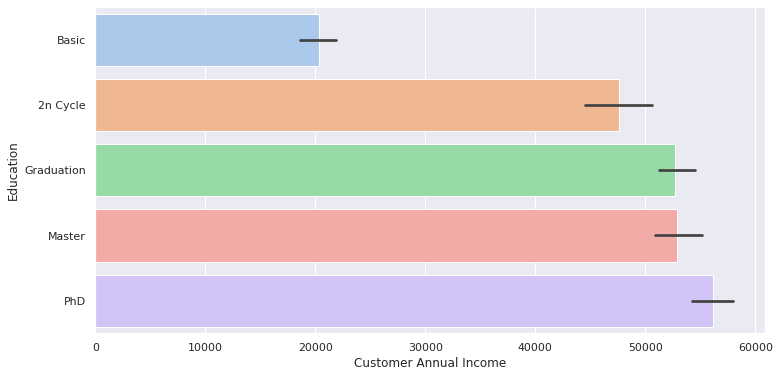

In [ ]:
display_elements = marketing_campaign_dataframe[['Income', 'Education']]
display_elements.columns = ['Customer Annual Income', 'Education']

import seaborn as sns

plt.figure(figsize=(12, 6))

sns.set()
sns.barplot(x=display_elements['Customer Annual Income'],
            y=display_elements['Education'],
            palette='pastel', order=['Basic', '2n Cycle', 'Graduation', 'Master',
                                     'PhD'])

plt.show()

In [ ]:
deep_learning_X_wDegree = X[['Complaints', 'Total spent', 'Total accepted during the campaign',
                     'Total purchases', 'Doctor', 'High School', 'Higher Education',
                     'Master', 'PhD']]

deep_learning_y_wDegree = X[['Customer response to the campaign']]

In [ ]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X_wDegree, deep_learning_y_wDegree, test_size=0.25, shuffle=True
)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 0.6845 - accuracy: 0.8110
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.8453
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.8459
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8453
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8555
Epoch 6/100
139/139 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8597
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8585
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8603
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8621
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3609 - accura

In [ ]:
print(ann.predict(sc.transform([[2, 2500, 1, 5, 0, 1, 0, 0, 0]])) > 0.5)

[[False]]


In [ ]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[461  17]
 [ 58  18]]
accuracy score for confusion matrix:  0.8646209386281588


#Implementing KNN Classifier

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

wcss = []

for number_of_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    kmeans_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans_labels)
    print('For numer_of_clusters = ', number_of_clusters,
          'Silhouette score is = ', silhouette)
    
    colors = cm.nipy_spectral(kmeans_labels / number_of_clusters)

For numer_of_clusters =  2 Silhouette score is =  0.5721124451379548
For numer_of_clusters =  3 Silhouette score is =  0.5763125517857092
For numer_of_clusters =  4 Silhouette score is =  0.48986024554348195
For numer_of_clusters =  5 Silhouette score is =  0.45799329277945133
For numer_of_clusters =  6 Silhouette score is =  0.46252628579409116
For numer_of_clusters =  7 Silhouette score is =  0.43904350907119777
For numer_of_clusters =  8 Silhouette score is =  0.40238997011994615
For numer_of_clusters =  9 Silhouette score is =  0.3786460666499623
For numer_of_clusters =  10 Silhouette score is =  0.37226353063113143
For numer_of_clusters =  11 Silhouette score is =  0.35059112791148933


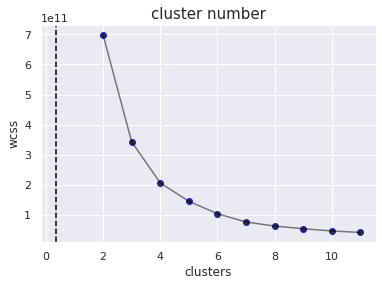

In [ ]:
plt.plot(range(2, 12), wcss[0:12], alpha=0.5, color='black')
plt.scatter(range(2, 12), wcss[0:12], alpha=0.8, color='black', edgecolors='blue')
plt.axvline(silhouette, color='black', linestyle='--')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

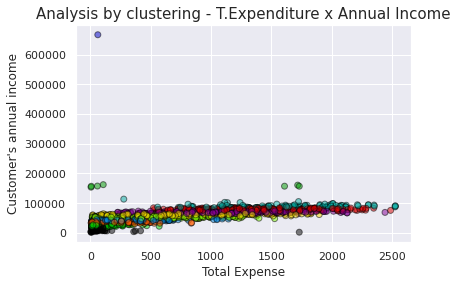

In [ ]:
plt.scatter(X['Total spent'], X['Customer Annual Income'], 
            c=colors, alpha=0.5, edgecolors='black')

plt.title('Analysis by clustering - T.Expenditure x Annual Income', fontsize=15)
plt.xlabel('Total Expense', fontsize=12)
plt.ylabel('Customer\'s annual income', fontsize=12)

plt.show()

In [ ]:
X = marketing_campaign_dataframe[['Complain', 'Total spent', 'Total accept cmp',
                                  'Total purchases']]

y = marketing_campaign_dataframe[['Response']]

In [ ]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [ ]:
for content in y:
    y.dropna(subset=[content], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True,
                                                    random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.8267857142857142


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.80357143 0.79464286 0.80357143 0.80357143 0.82142857 0.83035714
 0.84821429 0.83035714 0.83035714 0.84684685]


In [ ]:
print(knn.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]


<h1 align='center'><b>PART 2 IMPLEMENTATION</b></h1>



#IMPORT LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use(['fivethirtyeight'])

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

#LOAD DATA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv", sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.head().T

0           1           2           3           4
ID                         5524        2174        4141        6182        5324
Year_Birth                 1957        1954        1965        1984        1981
Education            Graduation  Graduation  Graduation  Graduation         PhD
Marital_Status           Single      Single    Together    Together     Married
Income                    58138       46344       71613       26646       58293
Kidhome                       0           1           0           1           1
Teenhome                      0           1           0           0           0
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014  19-01-2014
Recency                      58          38          26          26          94
MntWines                    635          11         426          11         173
MntFruits                    88           1          49           4          43
MntMeatProducts             546           6         127          20         118
MntFishProducts             172           2         111          10          46
MntSweetProducts             88           1          21           3          27
MntGoldProds                 88           6          42           5          15
NumDealsPurchases             3           2           1           2           5
NumWebPurchases               8           1           8           2           5
NumCatalogPurchases          10           1           2           0           3
NumStorePurchases             4           2          10           4           6
NumWebVisitsMonth             7           5           4           6           5
AcceptedCmp3                  0           0           0           0           0
AcceptedCmp4                  0           0           0           0           0
AcceptedCmp5                  0           0           0           0           0
AcceptedCmp1                  0           0           0           0           0
AcceptedCmp2                  0           0           0           0           0
Complain                      0           0           0           0           0
Z_CostContact                 3           3           3           3           3
Z_Revenue                    11          11          11          11          11
Response                      1           0           0           0           0

# DATA PREPARATION

**Attributes Information**

| Classification 	| Columns 	| Explanation 	|
|---	|---	|---	|
| User attributes 	| ID 	|  	|
| User attributes 	| Year_Birth 	|  	|
| User attributes 	| Education 	|  	|
| User attributes 	| Marital_Status 	|  	|
| User attributes 	| Income 	| Customer's yearly household income 	|
| User attributes 	| Kidhome 	| Number of children in customer's household 	|
| User attributes 	| Teenhome 	| Number of teenagers in customer's household 	|
| User health indicators 	| Dt_Customer 	| Date of customer's enrollment with the company 	|
| User health indicators 	| Recency 	| Number of days since customer's last purchase 	|
| User health indicators 	| NumWebVisitsMonth 	| Number of visits to company’s web site in the last month 	|
| User health indicators 	| Complain 	|  1 if customer complained in the last 2 years, 0 otherwise 	|
| Trading Information 	| MntWines 	| Amount spent on wine in last 2 years 	|
| Trading Information 	| MntFruits 	| Amount spent on fruits in last 2 years 	|
| Trading Information 	| MntMeatProducts 	| Amount spent on meat in last 2 years 	|
| Trading Information 	| MntFishProducts 	| Amount spent on fish in last 2 years 	|
| Trading Information 	| MntSweetProducts 	| Amount spent on sweets in last 2 years 	|
| Trading Information 	| MntGoldProds 	| Amount spent on gold in last 2 years 	|
| Source of transaction 	| NumWebPurchases 	| Number of purchases made through the company’s web site 	|
| Source of transaction 	| NumCatalogPurchases 	| Number of purchases made using a catalogue 	|
| Source of transaction 	| NumStorePurchases 	| Number of purchases made directly in stores 	|
| Operational conversion 	| NumDealsPurchases| Number of purchases made with a discount 	|
| Operational conversion  	| AcceptedCmp1 	| 1 if customer accepted the offer in the 1st campaign, 0 otherwise 	|
| Operational conversion  	| AcceptedCmp2 	| 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 	|
| Operational conversion  	| AcceptedCmp3 	| 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 	|
| Operational conversion  	| AcceptedCmp4 	|  if customer accepted the offer in the 4th campaign, 0 otherwise 	|
| Operational conversion  	| AcceptedCmp5 	|  if customer accepted the offer in the 5th campaign, 0 otherwise 	|
| Operational conversion  	| Response 	| 1 if customer accepted the offer in the last campaign, 0 otherwise 	|


In [ ]:
# Check for missing values
print("Missing value:\n", data.isnull().sum()) 

Missing value:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Check for duplicate data
data.duplicated().sum()

0

# DATA CLEANING
- There are 24 missing values in the income data, which are filled in with the mean value
- Customer registration time needs to be converted to date format
- The two variables of education level and marital status need to be recoded

In [ ]:
# Use the mean to fill in the 24 missing data in the income column
data = data.fillna(data['Income'].mean())

In [ ]:
# Adjust the data format of the registration date to the date format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'].apply(['min', 'max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
print("Marital_Status:\n", data['Marital_Status'].value_counts(), '\n')
print("Education:\n", data['Education'].value_counts())

Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


Text(0.5, 1.0, 'Propotion of Marital_Status')

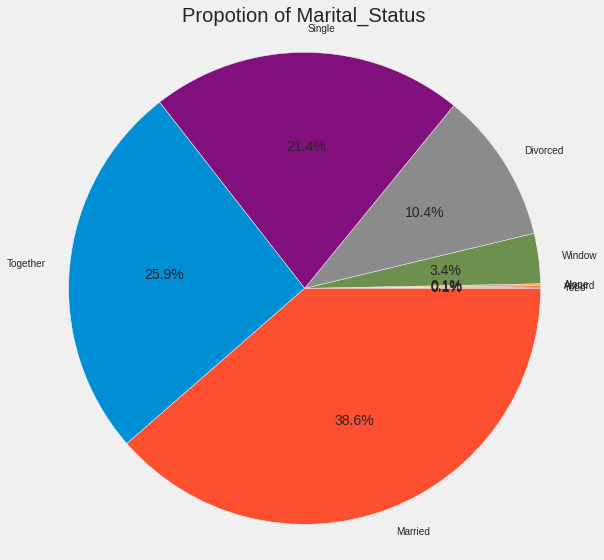

In [ ]:
# Percentage of customers in different marital status
plt.figure(figsize=(9, 9))
x = data['Marital_Status'].value_counts().sort_values()
plt.pie(x=x, labels=['YoLo', 'Absurd','Alone', 'Window', 'Divorced', 'Single', 'Together','Married'],
        autopct = '%1.1f%%', )
plt.axis('equal')
plt.title('Propotion of Marital_Status')

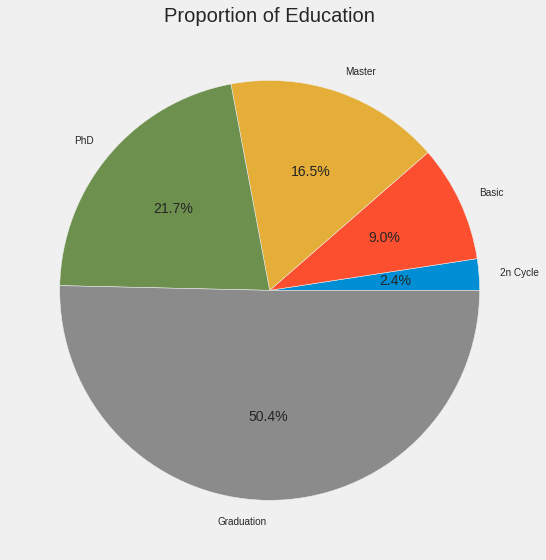

In [ ]:
# Percentage of customers with different education levels
x = data['Education'].value_counts().sort_values()

plt.figure(figsize=(9,9))
plt.pie(x=x, labels=['2n Cycle', 'Basic', 'Master', 'PhD', 'Graduation'], autopct = '%1.1f%%')
plt.title('Proportion of Education')
plt.show()

# DATA PREPROCESSING

**Create a new data feature:**

- Create Age column with date of birth
- Create Spent (total consumption) column
- Create a Children column
- Create TotalAcceptedCmp (total number of accepted quotes) column
- Create NumTotalPurchases (total purchase quantity) column

In [ ]:
data['Age'] = data.apply(lambda data:  2015- data['Year_Birth'], axis=1)
data['Spent'] = data.apply(lambda data: data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + 
                data['MntMeatProducts'] + data['MntSweetProducts'] + data['MntWines'], axis=1)


data['Children'] = data.apply(lambda data: data['Kidhome'] + data['Teenhome'], axis=1)

data['TotalAcceptedCmp'] = data.apply(lambda data: data['AcceptedCmp1'] + data['AcceptedCmp2'] + 
                                      data['AcceptedCmp3'] + data['AcceptedCmp4'] + 
                                      data['AcceptedCmp5'], axis=1)
data['NumTotalPurchases'] = data.apply(lambda data: data['NumWebPurchases'] + data['NumCatalogPurchases'] + 
                            data['NumStorePurchases'] + data['NumDealsPurchases'], axis=1)


In [ ]:
# Drop'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome' columns
data = data.drop(['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome'], axis=1) 

In [ ]:
# Delete the outliers of income and age in the data
data = data.drop(data.loc[data['Income'] > 600000].index)
data = data.drop(data.loc[data['Age'] > 100].index)

# DATA VISUALIZATION

In [ ]:
# Create a new feature "Have_Children", with children with a value of 1, and no children with a value of 0
data['Have_Children'] = np.where(data.Children > 0, 1, 0)
data.head()

ID   Education  ... NumTotalPurchases  Have_Children
0  5524  Graduation  ...                25              0
1  2174  Graduation  ...                 6              1
2  4141  Graduation  ...                21              0
3  6182  Graduation  ...                 8              1
4  5324         PhD  ...                19              1

[5 rows x 30 columns]

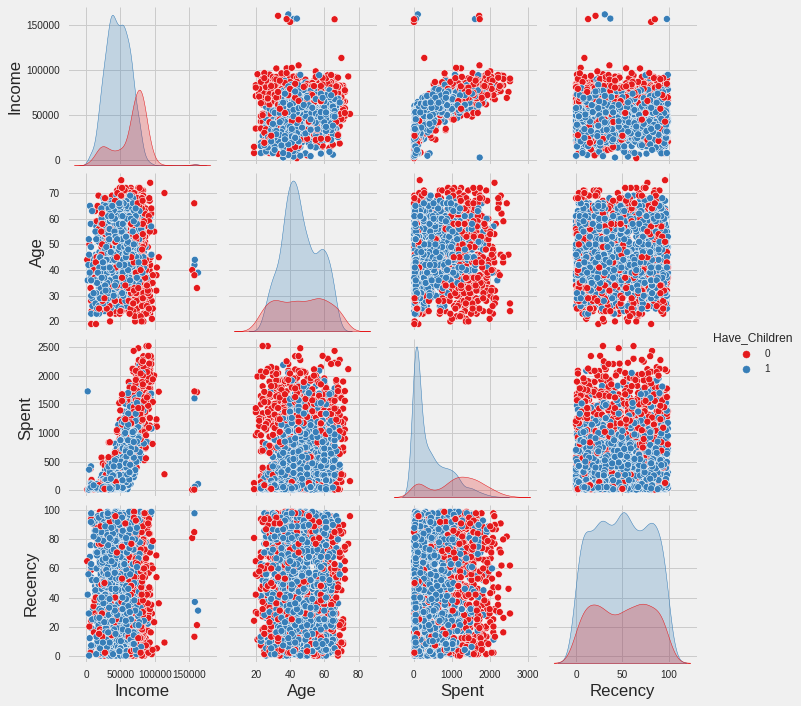

In [ ]:
# Group the data based on whether there are children and draw a scatter plot matrix
pairplot = data.loc[:, ['Income', 'Age', 'Spent', 'Recency', 'Have_Children']]

sns.pairplot(pairplot, hue='Have_Children', palette='Set1')

In [ ]:
# Cut the continuous variable Age
bins = [0, 20, 40, 60, 80,100]
aged = pd.cut(data['Age'], bins=bins)
print('number of age_cut:\n', aged.value_counts())

number of age_cut:
 (40, 60]     1143
(20, 40]      770
(60, 80]      316
(0, 20]         7
(80, 100]       0
Name: Age, dtype: int64


Text(0.5, 1.0, 'countplot of Age')

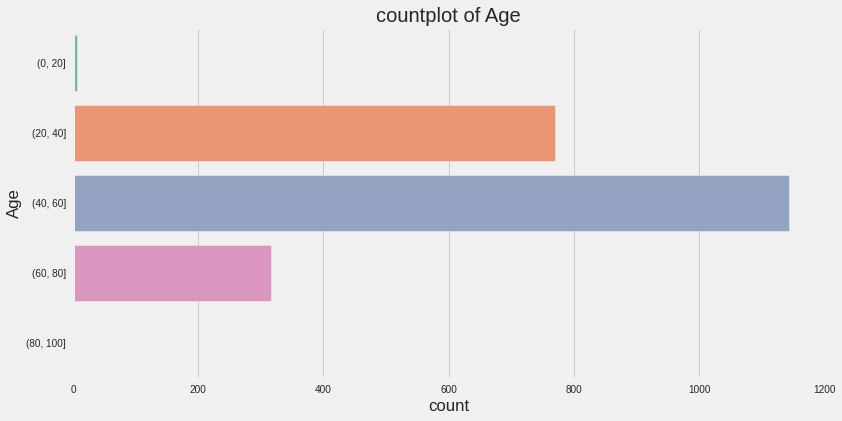

In [ ]:
# Different age group customer classification summary
plt.figure(figsize=(12,6))
sns.countplot(y=aged, palette='Set2')
plt.title('countplot of Age')

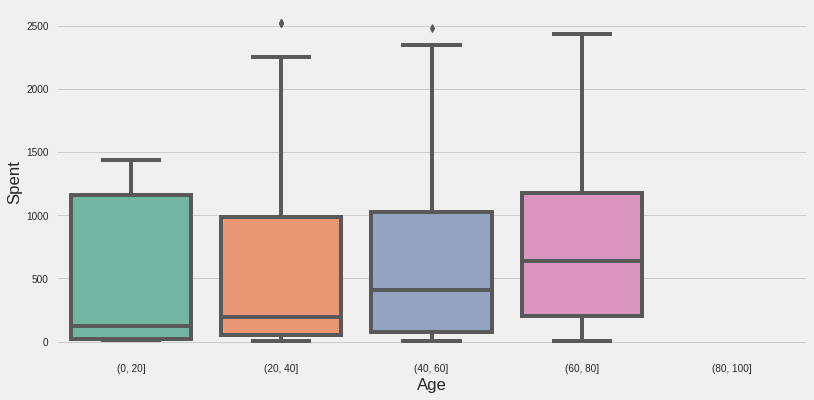

In [ ]:
# Differences in shopping expenses for different age ranges
plt.figure(figsize=(12,6))
sns.boxplot(x=aged, y=data['Spent'], palette='Set2')

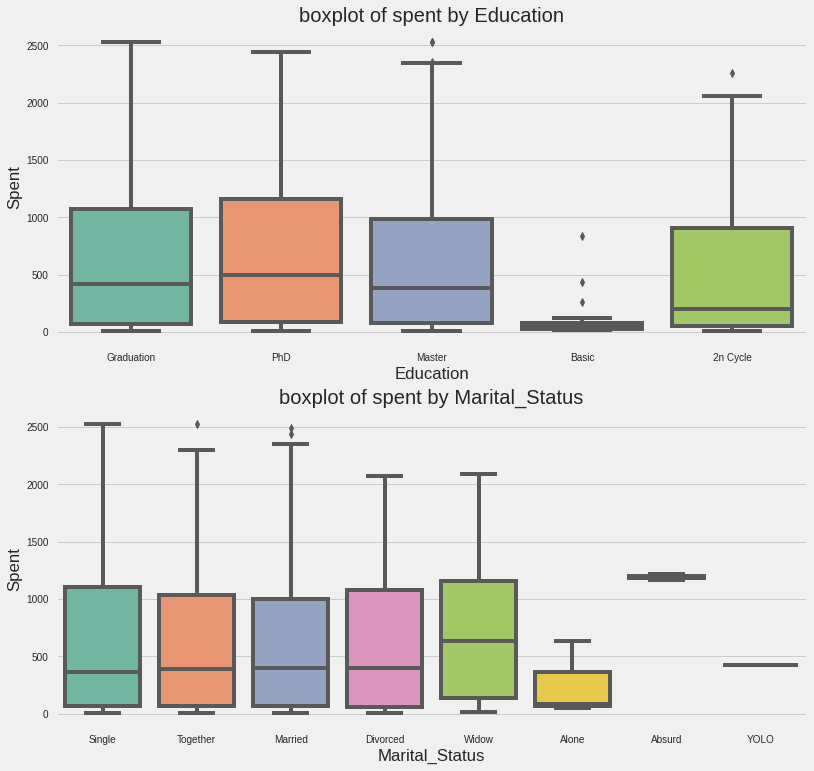

In [ ]:
# The relationship between education level and shopping expenses
# Comparison of customer spending in different marital status

to_boxplot = ['Education', 'Marital_Status']
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.flatten()

for col, ax in zip(to_boxplot, axes):
    ax = sns.boxplot(data=data, x=col, y='Spent', ax=ax, palette='Set2')
    ax.set_title(f'boxplot of spent by {col}')

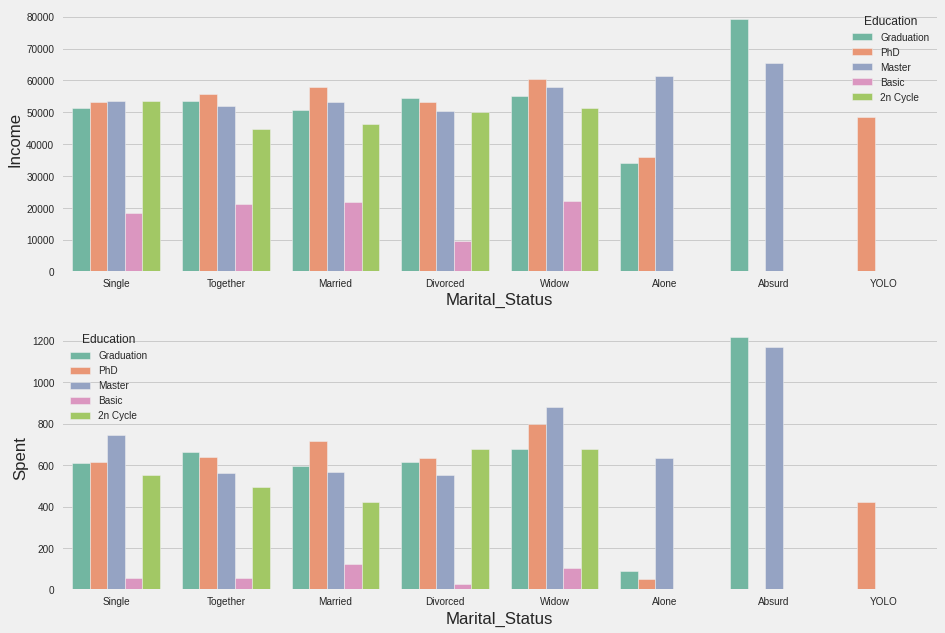

In [ ]:
# Group customers with different marital status based on their education level, and compare their differences in income and shopping expenses
fig, axes = plt.subplots(2, 1, figsize=(14,10))
sns.barplot(x= 'Marital_Status',y='Income',hue='Education',data=data, ci=0,palette='Set2', ax=axes[0])
sns.barplot(x= 'Marital_Status',y='Spent',hue='Education',data=data, ci=0, palette='Set2', ax=axes[1])

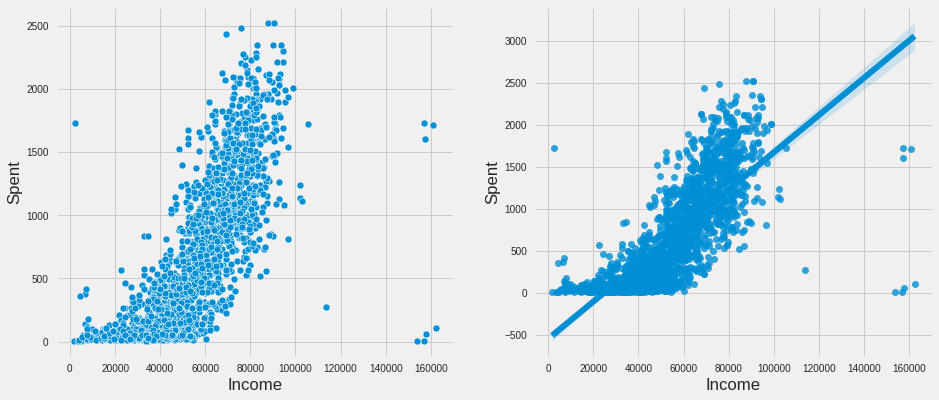

In [ ]:
# Income and expenditure show a linear growth relationship
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(y=data['Spent'], x=data['Income'], ax=axes[0])
sns.regplot(y='Spent', x='Income', data=data, ax=axes[1])


Text(0.5, 1.0, 'histogram of Spent')

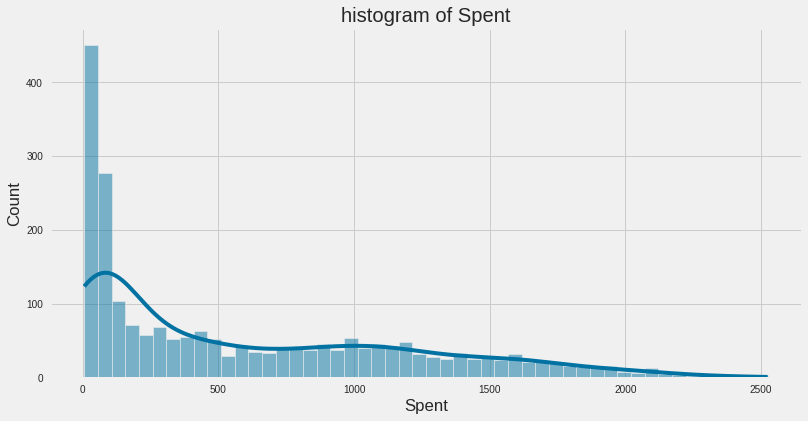

In [ ]:
# Histogram of overall website customer spending
plt.figure(figsize=(12,6))
sns.histplot(data['Spent'], bins=50, kde=True)
plt.title('histogram of Spent')

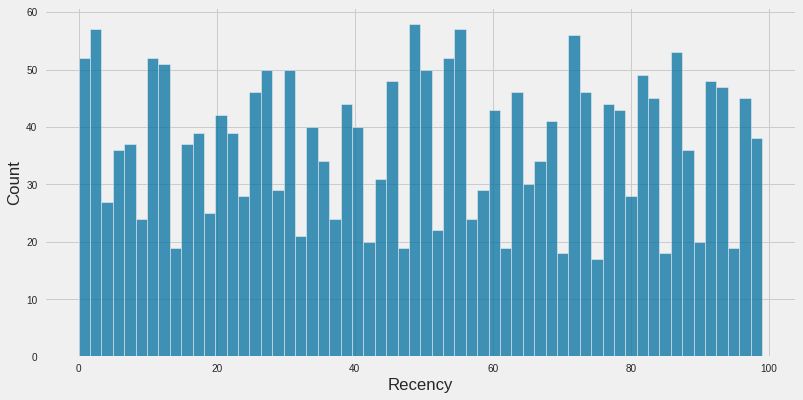

In [ ]:
# Frequency distribution of the number of days since the user's last purchase
plt.figure(figsize=(12,6))
sns.histplot(data['Recency'], bins=60)

Text(0.5, 1.0, 'Monthly activities (5-7)/month')

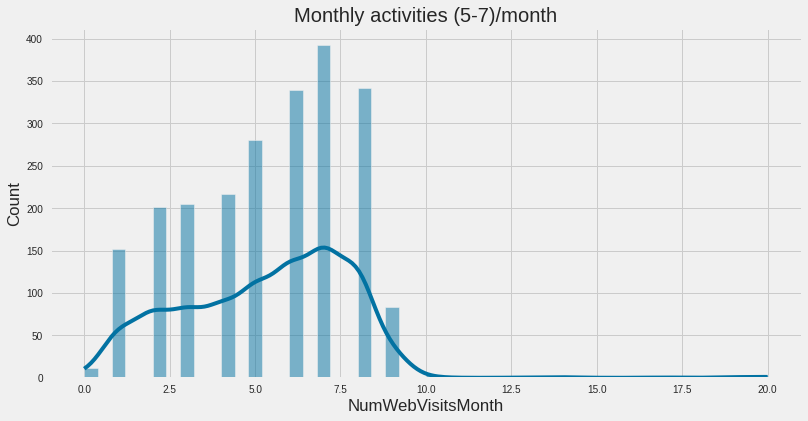

In [ ]:
# Statistics of monthly activity frequency of website users
plt.figure(figsize=(12,6))
sns.histplot(data['NumWebVisitsMonth'], bins=50, kde=True)
plt.title('Monthly activities (5-7)/month')

Text(0.5, 1.0, 'Complain of customer')

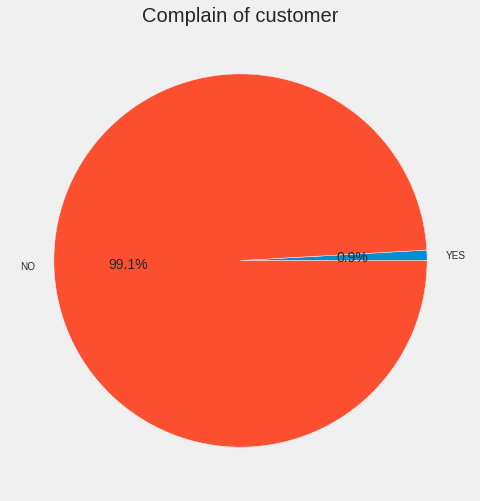

In [ ]:
# Website complaints
x = data['Complain'].value_counts().sort_values()

plt.figure(figsize=(8,8))
plt.pie(x=x, labels=['YES', 'NO'], autopct = '%1.1f%%')
plt.title('Complain of customer')

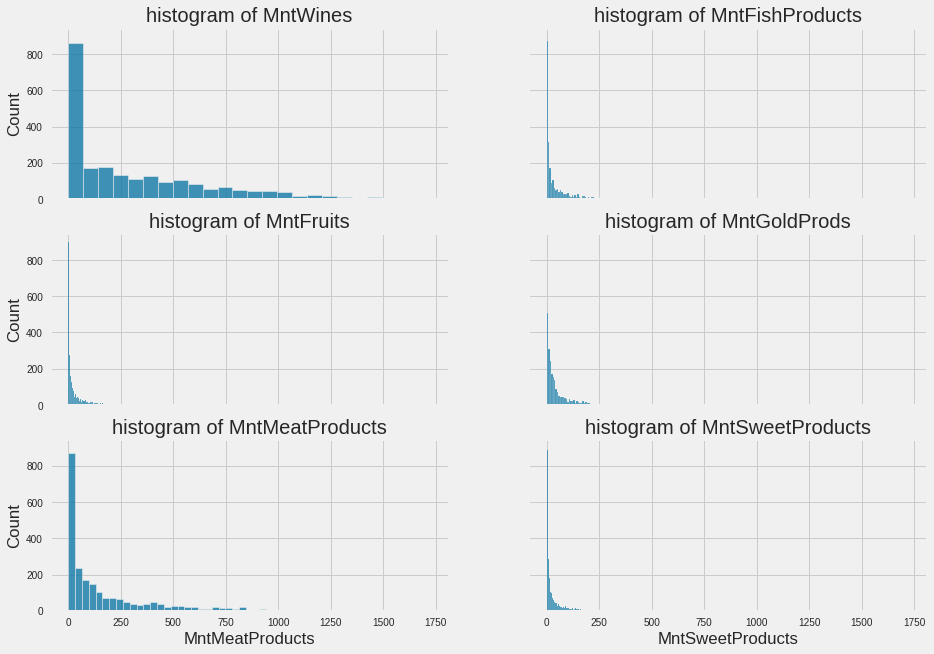

In [ ]:
# Frequency statistics of 'MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts'  respective sales
to_histplot = ['MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 
               'MntMeatProducts', 'MntSweetProducts']

fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(14, 10))
axes = axes.flatten()

for col, ax in zip(to_histplot, axes):
    ax = sns.histplot(data=data, x=col, ax=ax)
    ax.set_title(f'histogram of {col}')


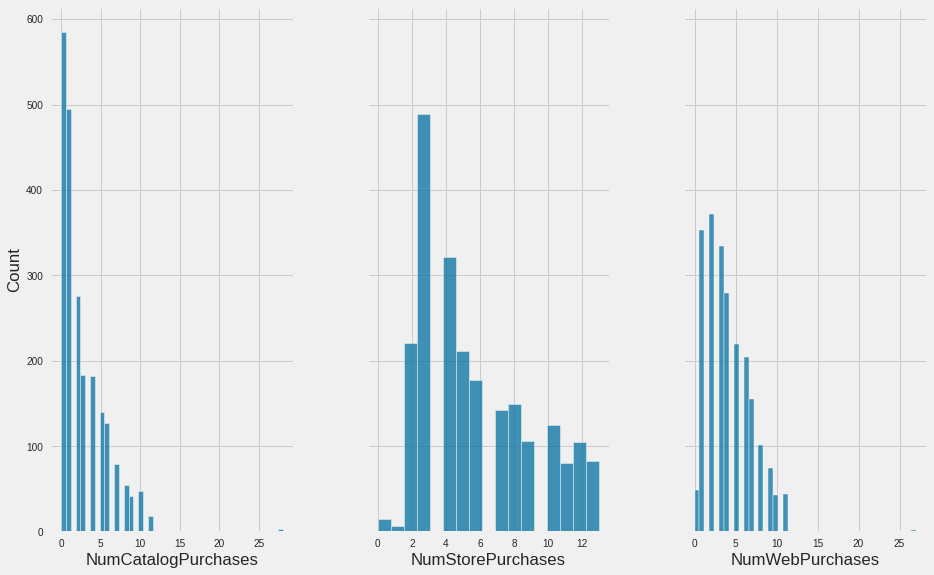

In [ ]:
# Statistics of the frequency of purchases through the three channels of catalogs, stores and websites
to_histplot = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 9))
axes = axes.flatten()

for col, ax in zip(to_histplot, axes):
    ax = sns.histplot(data=data, x=col, ax=ax)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

In [ ]:
# Create an indicator of the total number of bids accepted by the activity
acceptedConcat = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acceptedConcat = acceptedConcat.apply(pd.DataFrame.sum)

print('acceptedConcat:\n', acceptedConcat)

acceptedConcat:
 AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    162
dtype: int64


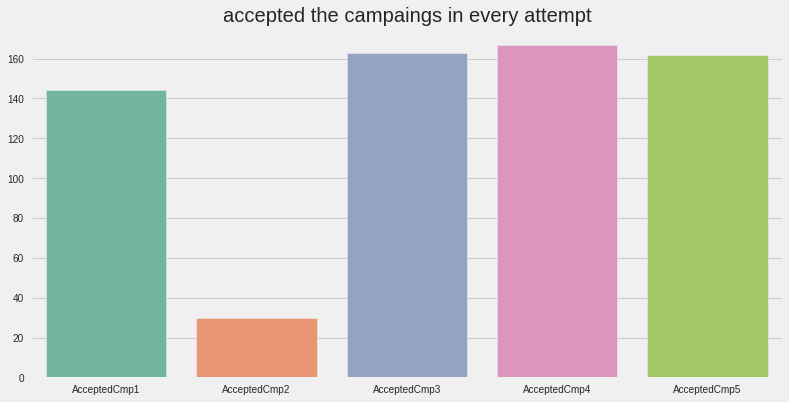

In [ ]:
# Create an indicator of the total number of bids accepted by the activity
plt.figure(figsize=(12,6))
plt.title('accepted the campaings in every attempt')
sns.barplot(x=acceptedConcat.index, y=acceptedConcat, palette='Set2')

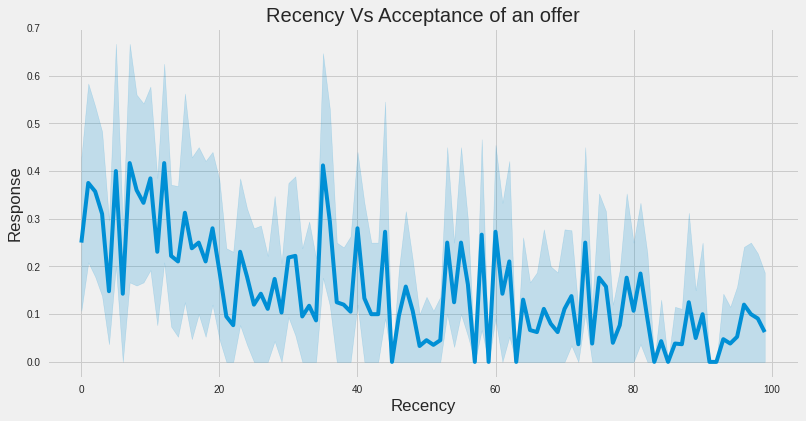

In [ ]:
# The relationship between the number of days since the user’s last purchase and whether the offer was accepted in the last activity
plt.figure(figsize=(12,6))
plt.title('Recency Vs Acceptance of an offer')
sns.lineplot(x='Recency', y='Response', data=data)

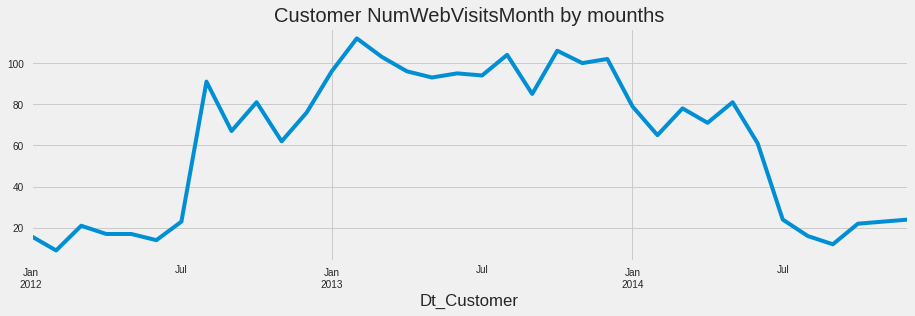

In [ ]:
# Website monthly active users line chart
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumWebVisitsMonth by mounths')
groupedDate.NumWebVisitsMonth.plot(kind='line')

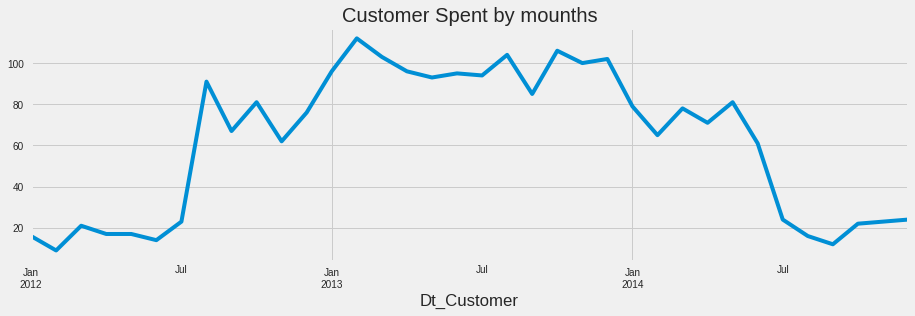

In [ ]:
# Line chart of total monthly consumption amount
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer Spent by mounths')
groupedDate.Spent.plot(kind='line')

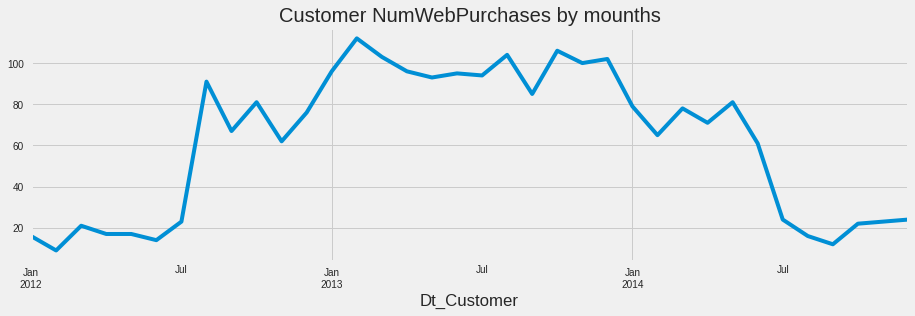

In [ ]:
# Line chart of users purchased through the website every month
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumWebPurchases by mounths')
groupedDate.NumWebPurchases.plot()

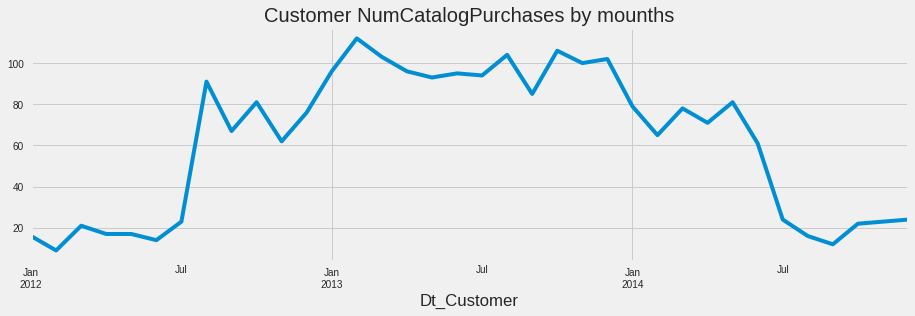

In [ ]:
# Line chart of users purchased through the catalog each month
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumCatalogPurchases by mounths')
groupedDate.NumCatalogPurchases.plot(kind='line')

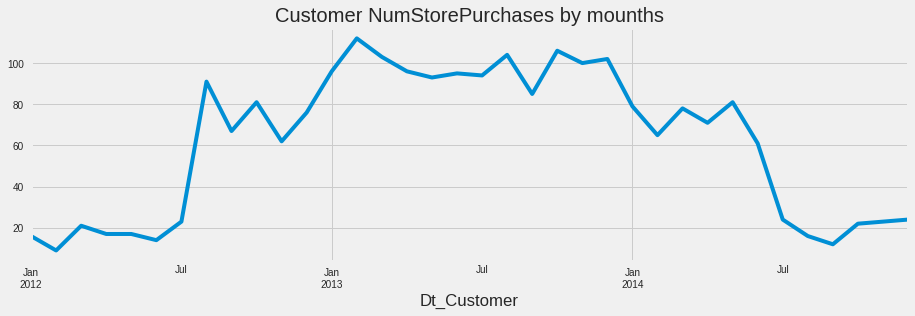

In [ ]:
#Monthly discount chart of users purchased through the store
groupedDate = data.set_index('Dt_Customer')

groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumStorePurchases by mounths')
groupedDate.NumStorePurchases.plot(kind='line')

Since June 2014, the number of website visits and the total number of transactions on the website has dropped sharply. The three channels of direct purchase through websites, catalogs, and stores all experienced the same trajectory decline.

In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [ ]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

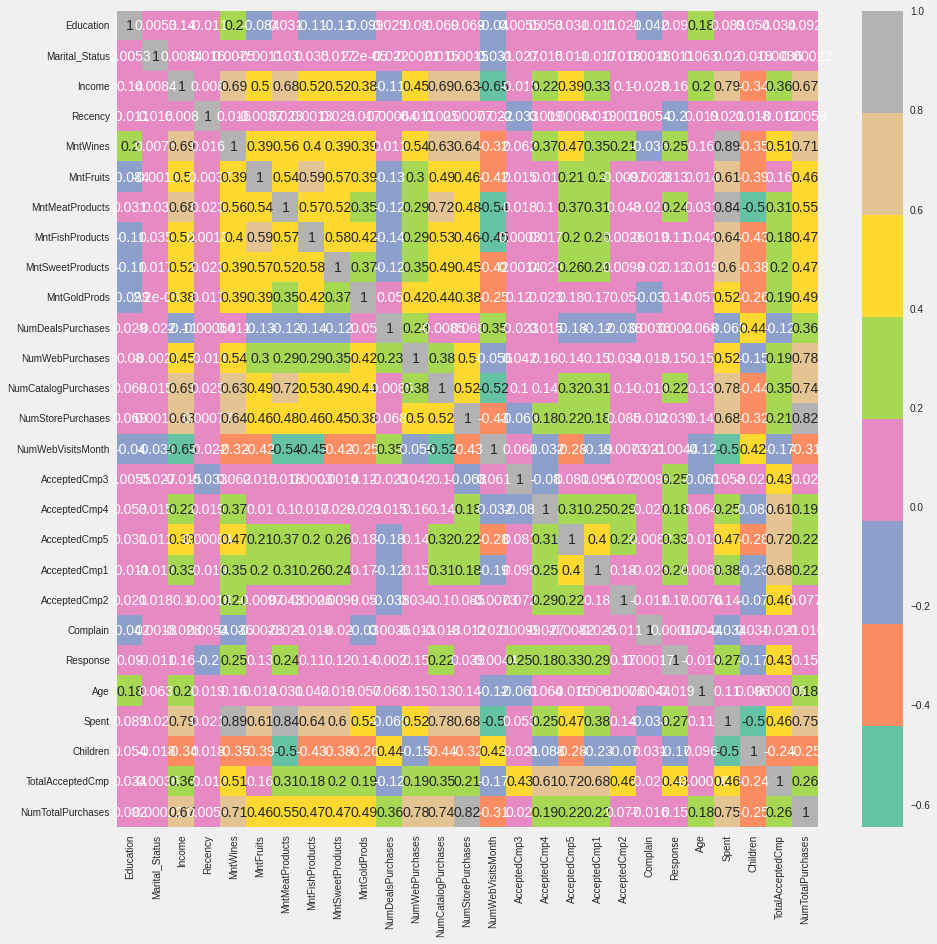

In [ ]:
# Correlation heat map
plt.figure( figsize = (14, 14))
data1 = data.iloc[:, 1:-1]
sns.heatmap(data1.corr(), annot=True, cmap='Set2')

In [ ]:
ds = data.copy()

cols_del = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
            'Complain', 'Response', 'Have_Children', 'Dt_Customer',  'Children']
ds = ds.drop(cols_del, axis=1)


In [ ]:
# Data standardization
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


# PCA DIMENSION REDUCTION

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std  ...       50%       75%       max
col1  2236.0 -4.965219e-17  2.750925  ... -0.625790  2.415185  7.796492
col2  2236.0 -1.092348e-18  1.364270  ... -0.237744  0.789402  5.707521
col3  2236.0  7.944351e-18  1.172936  ...  0.019396  0.728986  4.886794

[3 rows x 8 columns]

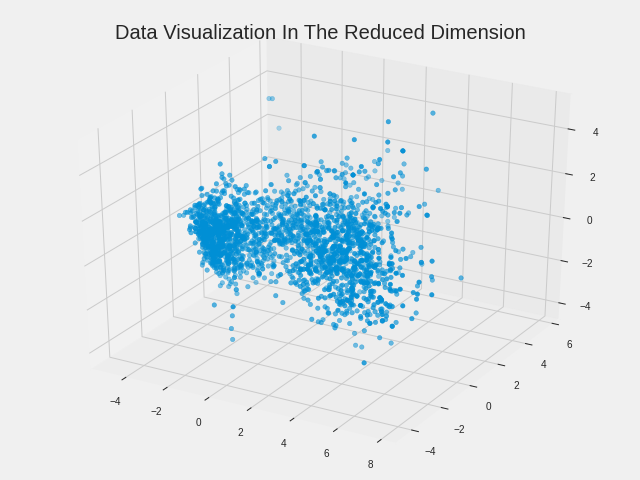

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# Data visualization after dimensionality reduction
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("Data Visualization In The Reduced Dimension")
plt.show()

# CLUSTER

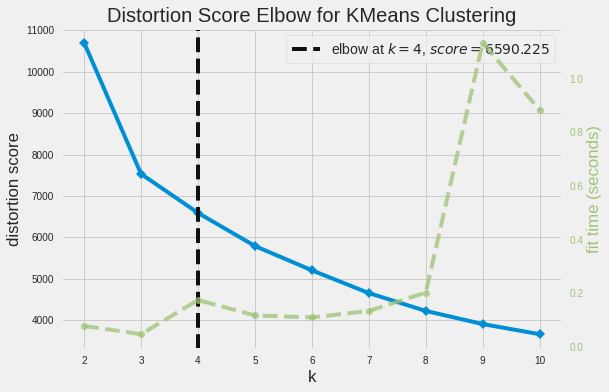

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)

# Fit the model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Add clustering features to the original data
data["Clusters"]= yhat_AC

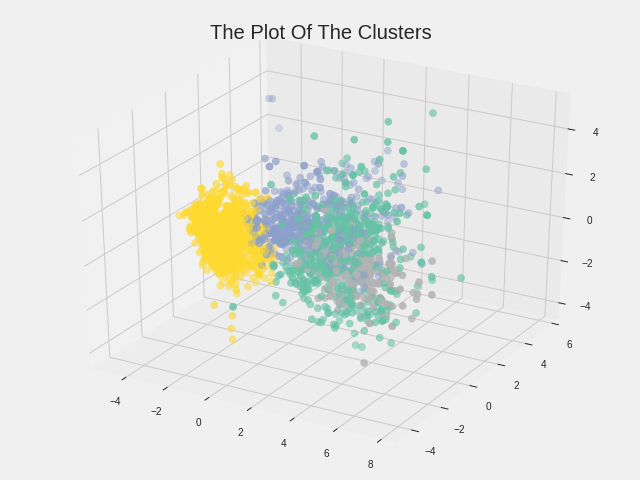

In [ ]:
# Visualization of clustering results
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=50, c=PCA_ds["Clusters"], marker='o', cmap = 'Set2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# EVALUATION MODEL

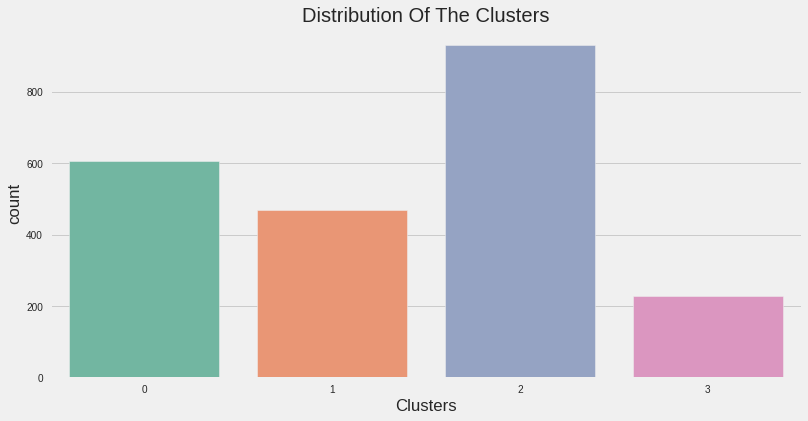

In [ ]:
# Distribution map of clustering results
plt.figure(figsize=(12, 6))
pl = sns.countplot(x=data["Clusters"], palette= 'Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()

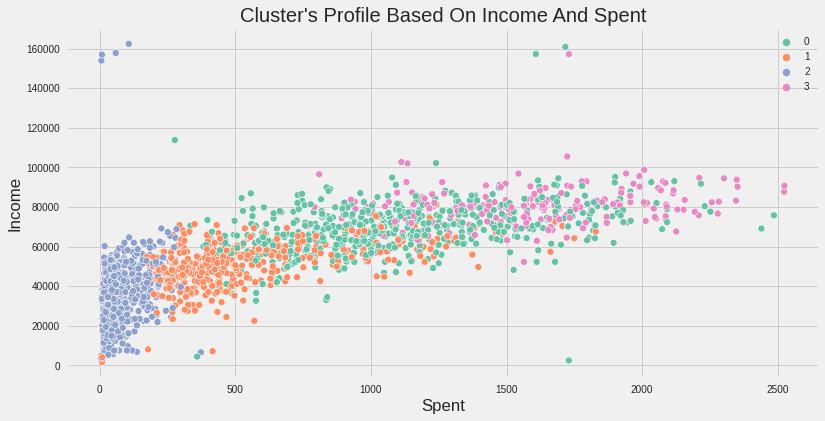

In [ ]:
# Visualize the clustering results according to income and expenditure
plt.figure(figsize=(12, 6))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= 'Set2')
pl.set_title("Cluster's Profile Based On Income And Spent")
plt.legend()
plt.show()

**Income and expenditure graph shows cluster mode**

- Group 0: High expenditure and average income
- Group 1: High consumption and high income
- Group 2: Low expenditure and low income
- Group 3: High expenditure and low income

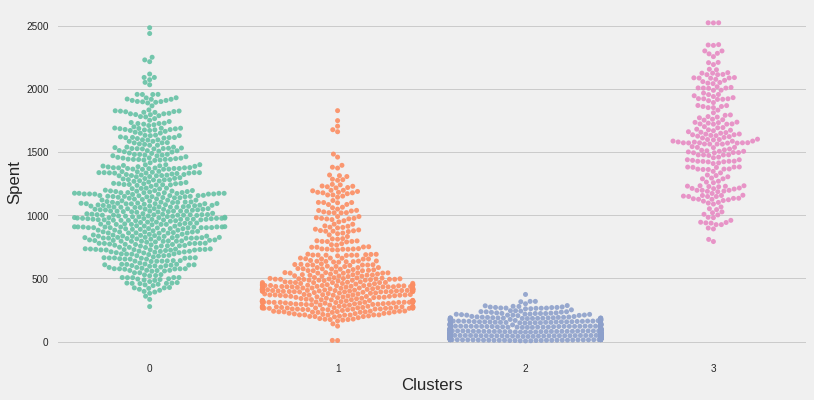

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data["Clusters"], y=data["Spent"], alpha=0.9, palette= 'Set2' )

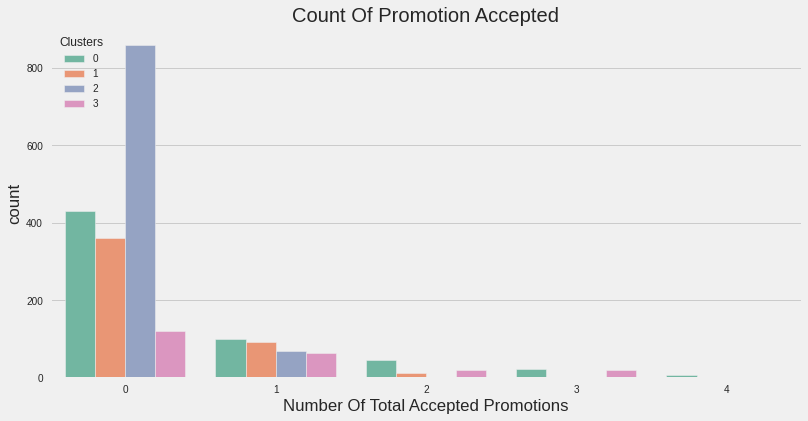

In [ ]:
# Visualize the total acceptance of activities according to the clustering results
plt.figure(figsize=(12,6))
pl = sns.countplot(x=data["TotalAcceptedCmp"],hue=data["Clusters"], palette= 'Set2')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
#include <iostream>
#include <time.h>
using namespace std;

int main() {

// n is 0.1 to 0.5 million
int n = 600000;
// four arrays with length n
int A[n], B[n], C[n], D[n];

for (int i = 1; i <= n; i++){
	A[i] = i;
	B[i] = i;
}

// t to note start time
clock_t t = clock();

// Normal loop
for (int i = 1; i <= n; i++){
	A[i] = B[i] + 1;
	C[i] = A[i]/2;
	D[i] = 1/C[i];
}
// to mark end time
t = clock() - t;

cout << "For n = " <<n<< endl;
cout << "time taken by normal loops: " << (float)t / CLOCKS_PER_SEC << "seconds"<< endl;

for (int i = 1; i <= n; i++){
	A[i] = i;
	B[i] = i;
}

// to mark start time of unrolling
t = clock();

for (int i = 1; i <= n; i++)
    A[i] = B[i] + 1;
for (int i = 1; i <= n; i++)
	C[i] = A[i]/2;
for (int i = 1; i <= n; i++)
	D[i] = 1/C[i];

// to mark the end of loop
t = clock() - t;

cout << "Time taken by Loop Fusion: " << (float)t / CLOCKS_PER_SEC<< "seconds";
return 0;
}
